<style>
.rendered_html * + p, .rendered_html p {
    text-align:justify;
}
.print {
    display:none;
}
.highlight {
    background:white;
}
@media print {
 a[href]:after {
     content: ""
 }
 .noprint {
  display:none
  }
  .print {
        display:block;
    }
}
</style>
<head>
    <base target="_blank">
</head>
<div style="text-align:left"><a href="http://web.dmi.unict.it/"><img src="img/dmi.png" style="width:300px; margin:0;"></a></div>

<a href="http://iplab.dmi.unict.it/"><img src="img/iplab.png" style="width:900px"></a>
<center><h2>Machine Learning - A.A. 2020-2021</h2></center>
<center><h3>Softmax, Stochastic Gradient Descent, MLP, Caricamento Dati con PyTorch</h3></center>
<br>
<center>Antonino Furnari - <a href="http://www.dmi.unict.it/~furnari/" target="_blank">http://www.dmi.unict.it/~furnari/</a> - <a href="mailto:furnari@dmi.unict.it">furnari@dmi.unict.it</a> </center>
<center>Giovanni Maria Farinella - <a href="http://www.dmi.unict.it/farinella/" target="_blank">http://www.dmi.unict.it/farinella/</a> - <a href="mailto:gfarinella@dmi.unict.it">gfarinella@dmi.unict.it</a> </center>

# 1. Classificazione SoftMax

Abbiamo visto come sia possibile "trasformare" un regressore lineare in un classificatore binario utilizzando la funzione logistica. Abbiamo anche visto che è possibile implementare un classificatore multiclasse mediante il principio "one-vs-all". Tuttavia, il principio one-vs-all è poco naturale per risolvere problemi di classificazione multiclasse. Un regressore logistico ci permette di stimare la probabilità:

\begin{equation}
p(c\ |\ x)
\end{equation}

dove $c$ è la classe ($c=0$ nel caso della classe negativa e $c=1$ nel caso della classe positiva) e $x$ è il campione in ingresso. Sappiamo inoltre che

\begin{equation}
p(c=0\ |\ x)+p(c=1\ |\ x)=1
\end{equation}

per cui il un regressore logistico ci permette di stimare la distribuzione di probabilità condizionale sulle classi possibili (solo due in questo caso), dato il campione in ingresso $x$.

Supponiamo adesso di avere un problema di classificazione su $K$ classi $c=0, c=1, \ldots, c=K-1$. Il principio "one-vs-all" ci permette di classificare gli elementi $x$, ma non di stimare direttamente una distribuzione di probabilità condizionale sulle tre classi dato il campione in ingresso:

\begin{equation}
p(c\ |\ x)\ :\ p(c=0\ |\ x)+p(c=1\ |\ x)+\ldots + p(c=K\ |x\ )=1
\end{equation}

**Domanda 1**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

A cosa può servire stimare le probabilità a posteriori $p(c\ |\ x)$ oltre a inferire la classe più probabile per il campione $x$?

**Risposta 1**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

Se volessimo ottenere una distribuzione di probabilità sulle $K$ classi, potremmo pensare di costruire un regressore lineare che, preso in input un dato, restituisce un vettore di $K$ elementi. Ciò può essere ottenuto semplicemente con una trasformazione lineare del tipo $\mathbf{z}=A\mathbf{x} + \mathbf{b}$, dove $A$ è una matrice $n\times K$, con $n$ numero di feature in ingresso. Analogamente a quanto visto nel caso del regressore logistico, tuttavia, non vi è alcuna garanzia che il vettore $\mathbf{z}$ rappresenti una valida distribuzione di probabilità. Ricordiamo che affinché ciò accada ci serve che:
 * $z_i\geq0,\ \forall i \in \{1,\ldots,K\}$;
 * $\sum_{i=1}^K z_i = 1$.

La funzione SoftMax è una generalizzazione della funzione logistica che ci permette di normalizzare un vettore arbitrario di numeri in modo che rispetti le due proprietà appena viste:

\begin{equation}
\sigma(\mathbf{x})_j = \frac{e^{z_j}}{\sum_{k=1}^K{e^{z_k}}}
\end{equation}

dove $z_j$ rappresenta la j-esima componente del vettore $\mathbf{z}$ (e dunque $\sigma(\mathbf{x})_j$ rappresenta la j-esima componente del vettore normalizzato mediante SoftMax $\sigma(\mathbf{x})$). In pratica, la funzione SoftMax esegue due operazioni:
 * Applica la funzione esponenziale a tutte le componenti del vettore non normalizzato ($e^{z_i}$). Questa operazione permette di soddisfare la prima proprietà mappando numeri $x \in ]-\infty, +\infty[$ su numeri del range $[0,+\infty[$. Si noti che la funzione esponenziale è monotona crescente, per cui se $z_i \leq z_j$, allora $e^{z_i} \leq e^{z_j}$;
 * Normalizza gli elementi del vettore in uscita dividendoli per la somma dei valori positivi $e^{z_i}$ ($\frac{e^{z_i}}{\sum z_k}$). Questa normalizzazione ci assicura che la seconda proprietà sia rispettata: $\sum_{i=1}^K \sigma(\mathbf{z})_i = 1$.

**Domanda 2**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Cosa garantisce che i valori restituiti dalla funzione SoftMax siano non negativi? Disegnare la funzione esponenziale per rispondere alla domanda. E' possibile ottenere delle probabilità nulle utilizzando la funzione SoftMax in teoria? E' possibile in pratica?

**Risposta 2**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

La formulazione del regressore SoftMax è dunque la seguente:

\begin{equation}
f(\mathbf{x}) = \sigma(A \mathbf{x} +\mathbf{b}) = \sigma(\mathbf{z})= \frac{e^{z_j}}{\sum_{k=1}^K{e^{z_k}}}
\end{equation}

dove $\mathbf{z}=A \mathbf{x} +\mathbf{b}$, la funzione f stima la probabilità a posteriori che $\mathbf{x}$ appartenga ad una data classe:

\begin{equation}
p(c=i\ |\ \mathbf{x}) = f(\mathbf{x})_i
\end{equation}

e $f(\mathbf{x})_i$ indica la iesima componente del vettore di probabilità ottenuto mediante il regressore softmax $f$.

Per allenare il regressore softmax, utilizziamo una generalizzazione della loss vista nel caso del regressore logistico: la **cross entropy loss**. In teoria dell'informazione, la cross entropy tra due distribuzioni di probabilità $p$ e $q$ è definita come:

\begin{equation}
H(p,q) = -\sum_x p(x) \log q(x)
\end{equation}

La cross entropy $H(p,q)$ indica il *numero medio di bit necessario per identificare eventi $x$ che seguono la probabilità $p$ se li descriviamo con la probabilità stimata $q$*. La cross entropy raggiunge il suo minimo quando $p$ e $q$ sono uguali. In tal caso la cross entropy corrisponde all'entropia di $p$:

\begin{equation}
H(p) = -\sum_x p(x) \log p(x)
\end{equation}

Nel nostro caso, la probabilità $q$ è data dal regressore softmax, mentre $p$ rappresenta la probabilità "ideale" che il campione $x$ appartenga a una data classe. Dato che conosciamo le classi di appartenenza di ogni campione, la probabilità ideale è data da una rappresentazione di tipo "one-hot-vector", in cui $p(\mathbf{x})=\mathbf{y}$ e $\mathbf{y}$ ha una unica componente $y_j=1$, mentre tutte le altre sono nulle. Ad esempio, se le classi sono tre e il campione appartiene alla seconda classe ($c=1$), allora $\mathbf{y}=[0,1,0]$.

**Domanda 3**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

I vettori "one-hot" $\mathbf{y}$ sono delle valide distribuzioni di probabilità?

**Risposta 3**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

Possiamo dunque scrivere la loss relativa a un dato campione $\mathbf{x}$ di etichetta (one-hot) $\mathbf{y}$ come segue:

\begin{equation}
\mathcal{L}_\theta(\mathbf{x},\mathbf{y}) = -\sum_i \mathbf{y}_i \log f(\mathbf{x})_i
\end{equation}

Notiamo che, $\mathbf{y}_i$ sarà uguale a zero tranne che per $i=j$, dove $j$ è la classe del campione $\mathbf{x}$. Pertanto, solo uno dei termini della sommatoria nella formula sopra sarà non nullo. Ciò ci permette di riscrivere la loss come segue:

\begin{equation}
\mathcal{L}_\theta(\mathbf{x},j) = - \log f(\mathbf{x})_j
\end{equation}

Dove $j$ è la classe di $\mathbf{x}$. Ricordando che $f(\mathbf{x}) = \sigma(A \mathbf{x} +\mathbf{b}) = \sigma(\mathbf{z})= \frac{e^{z_j}}{\sum_{k=1}^K{e^{z_k}}}$, possiamo riscrivere la loss come:

\begin{equation}
\mathcal{L}_\theta(\mathbf{x},j) = - \log \frac{e^{z_j}}{\sum_{k=1}^K{e^{z_k}}} = \log \sum_{k=1}^K{e^{z_k}} - \log {e^{z_j}}
\end{equation}

da cui, ricordando che $\mathbf{z}=A \mathbf{x} +\mathbf{b}$, abbiamo:

\begin{equation}
\mathcal{L}_\theta(\mathbf{x},j) = \log \sum_{k=1}^K{e^{z_k}} -z_j
\end{equation}

**Domanda 4**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Le loss $\mathcal{L}_\theta(\mathbf{x},j) = - \log f(\mathbf{x})_j$ e $\mathcal{L}_\theta(\mathbf{x},j) = \log \sum_{k=1}^K{e^{z_k}} -z_j$ sono entrambe valide? Una delle due offre dei vantaggi rispetto all'altra?

**Risposta 4**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

## 1.1 Implementazione di un Regressore Softmax
Implementiamo un regressore softmax. Iniziamo caricando il dataset delle iris di Fisher. Si tratta di un dataset contenente le misurazioni di $4$ quantità relative a $150$ fiori appartenenti a $3$ specie diverse. Il dataset viene spesso utilizzato per illustrare il funzionamento degli algoritmi di classificazione multiclasse, considerando il problema di stimare la specie di appartenenza di ciascun fiore a partire dalle misurazioni. 

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X=iris.data
Y=iris.target
#features
print(X.shape)
#classi target
print(Y.shape)
print(Y)

(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


I dati dunque caratterizzati da:
 * $4$ features;
 * $3$ classi;
 * $150$ istanze.

Impostiamo un seed per avere risultati ripetibili:

In [2]:
import torch
import numpy as np
np.random.seed(1234)
torch.random.manual_seed(1234);

Otteniamo una permutazione casuale dei dati:

In [3]:
idx = np.random.permutation(len(X))

Applichiamo la stessa permutazione a X e Y:

In [4]:
X = X[idx]
Y = Y[idx]

Suddividiamo il dataset in **training** e **testing** set indipendenti selezionando i primi $30$ valori per formare il testing set. Trasformiamo inoltre gli array in tensori:

In [5]:
from torch import Tensor
X_training = Tensor(X[30:])
Y_training = Tensor(Y[30:])
X_testing = Tensor(X[:30])
Y_testing = Tensor(Y[:30])

Normalizziamo i dati:

In [6]:
X_mean = X_training.mean(0)
X_std = X_training.std(0)

X_training_norm = (X_training-X_mean)/X_std
X_testing_norm = (X_testing-X_mean)/X_std

Definiamo dunque un nuovo modulo per effettuare la regressione softmax:

In [7]:
from torch import nn

class SoftMaxRegressor(nn.Module):
    def __init__(self, in_features, out_classes):
        """Costruisce un regressore softmax.
            Input:
                in_features: numero di feature in input (es. 4)
                out_classes: numero di classi in uscita (es. 3)"""
        super(SoftMaxRegressor, self).__init__() #richiamo il costruttore della superclasse
        #questo passo è necessario per abilitare alcuni meccanismi automatici dei moduli di PyTorch
        
        self.linear = nn.Linear(in_features,out_classes) #il regressore softmax restituisce 
        #distribuzioni di probabilità, quindi il numero di feature di output coincide con il numero di classi
        
    def forward(self,x):
        """Definisce come processare l'input x"""
        scores = self.linear(x)
        return scores

Costruiamo un regressore softmax e passiamogli i dati di training:

In [8]:
model = SoftMaxRegressor(4,3)# 4 feature in ingresso, 3 classi in uscita
#mostriamo le prime 4 predizioni
model(X_training_norm)[:10]

tensor([[ 0.9326,  0.6582, -0.2940],
        [-0.1301, -0.2885,  0.1746],
        [ 1.1440,  1.6170, -1.0236],
        [-0.1766, -0.4061,  0.2196],
        [-0.4706, -0.5166,  0.2307],
        [ 1.2162,  1.5326, -0.9408],
        [ 1.6219,  1.6549, -0.9210],
        [ 0.8984,  1.2598, -0.8457],
        [ 1.4105,  1.9569, -1.2018],
        [ 1.0097,  0.5520, -0.2012]], grad_fn=<SliceBackward>)

Ogni riga della matrice è una predizione. Come si può notare, non si tratta di valide distribuzioni di probabilità. Per ottenere le distribuzioni dobbiamo utilizzare la funzione softmax:

In [9]:
softmax = nn.Softmax(dim=1)#dim=1 specifica che effettueremo il sofmax per righe
softmax(model(X_training_norm))[:10]

tensor([[0.4870, 0.3701, 0.1428],
        [0.3116, 0.2659, 0.4225],
        [0.3678, 0.5902, 0.0421],
        [0.3048, 0.2423, 0.4529],
        [0.2518, 0.2405, 0.5077],
        [0.4020, 0.5516, 0.0465],
        [0.4734, 0.4893, 0.0372],
        [0.3831, 0.5499, 0.0670],
        [0.3571, 0.6167, 0.0262],
        [0.5180, 0.3277, 0.1543]], grad_fn=<SliceBackward>)

Ogni riga della matrice è adesso una valida distribuzione di probabilità sulle tre classi considerate. Infatti, la somma dei valori lungo le righe è, come ci si aspetterebbe, pari ad 1:

In [10]:
softmax(model(X_training_norm)).sum(1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

Una volta allenato, il modello ci permetterà di predire una distribuzione di probabilità per ogni elemento. Per ottenere l'etichetta predetta, possiamo applicare il principo Maximum A Posteriori (MAP), scegliendo la classe che presenta la probabilità maggiore mediante la funzione argmax, che è inclusa in PyTorch nella funzione max:

In [11]:
#la funzione max restituisce i valori dei massimi 
#e i loro indici (il risultato della funzione argmax)
#per questo includiamo "[1]" nell'equazione successiva
preds = softmax(model(X_training_norm)).max(1)[1]
preds

tensor([0, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
        0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2, 0, 1, 2, 1, 2, 1, 0,
        0, 1, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2, 2, 0, 1, 1, 0, 0,
        1, 2, 0, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 1, 1,
        1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1])

Abbiamo dunque ottenuto le predizioni sotto forma di indici delle tre clasis, che vanno da $0$ a $2$. Possiamo dunque valutare le predizioni come visto nel caso binario. Ad esempio, possiamo calcolare l'accuracy come segue:

In [12]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_training,preds))

0.35833333333333334


L'accuracy è bassa in quanto dobbiamo ancora allaenare il modello. 

Va notato che, dato che la funzione softmax è monotona, possiamo applicare la funzione argmax direttamente ai logits ottenendo lo stesso risultato:

In [13]:
preds_logits = model(X_training_norm).max(1)[1]
print((preds_logits==preds).float().mean()) #il risultato ottenuto è lo stesso

tensor(1.)


In pratica, si preferisce dunque non applicare la funzione softmax per il calcolo delle etichette predette.

La procedura di training del regressore logistico sarà la seguente:

1. Normalizzare i dati in ingresso $\mathbf{x}$; 
2. Costruire il modulo che implementa il modello (il costruttore si preoccuperà di inizializzare i parametri);
3. Mettere il modello in modalità "training";
4. Calcolare l'output del modello $\hat y$;
5. Calcolare il valore della loss $\mathcal{L}_\theta(\mathbf{x},y)$;
6. Calcolare il gradiente della loss rispetto ai parametri del modello;
7. Aggiornare i pesi $\theta$ utilizzando il gradient descent;
8. Ripetere i passi 4-7 fino a convergenza.

Implementiamo la procedura includendo il monitoring delle curve mediante tensorboard e il calcolo dell'accuracy ad ogni iterazione.

In [14]:
from torch.utils.tensorboard import SummaryWriter
from torch.optim import SGD

writer = SummaryWriter('logs/softmax_regressor')

lr = 0.1
epochs = 500

#normalizzazione dei dati
X_mean = X_training.mean(0)
X_std = X_training.std(0)

X_training_norm = (X_training-X_mean)/X_std
X_testing_norm = (X_testing-X_mean)/X_std

model = SoftMaxRegressor(4,3)
criterion = nn.CrossEntropyLoss() #utilizziamo la cross entropy loss
optimizer = SGD(model.parameters(),lr) #utilizziamo un optimizer

for e in range(epochs):
    model.train()
    out = model(X_training_norm)
    l = criterion(out,Y_training.long())
    l.backward()
    writer.add_scalar('loss/train', l.item(), global_step=e)
    
    optimizer.step()
    optimizer.zero_grad()
    
    preds_train = out.max(1)[1]
    writer.add_scalar('accuracy/train', accuracy_score(Y_training,preds_train), global_step=e)
    
    model.eval()
    with torch.set_grad_enabled(False):
        out = model(X_testing_norm)
        l = criterion(out, Y_testing.long())
        writer.add_scalar('loss/test', l.item(), global_step=e)
        preds_test = out.max(1)[1]
        writer.add_scalar('accuracy/test', accuracy_score(Y_testing,preds_test), global_step=e)

Calcoliamo accuracy di training e test:

In [15]:
preds_train = model(X_training_norm).max(1)[1]
preds_test = model(X_testing_norm).max(1)[1]
print("Accuracy di training",accuracy_score(Y_training,preds_train))
print("Accuracy di test",accuracy_score(Y_testing,preds_test))

Accuracy di training 0.9583333333333334
Accuracy di test 1.0


**Domanda 5**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Si confronti la procedura di training appena vista con quelle viste in precedenza. Quali sono le principali differenze?

**Risposta 5**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

# 2. Datasets, Data Loaders, Stochastic Gradient Descent, Salvataggio e Caricamento dei Modelli

Finora abbiamo effettuato la discesa del gradiente calcolando i gradienti rispetto alla loss calcolata sull'intero dataset. Questa procedura è nota come "Batch Gradient Descent". In pratica, se il dataset è molto grande, questa procedura può essere infattibile (se il dataset è grande, potrebbe essere difficile tenerlo tutto in memoria RAM). Per superare questi limiti, è possibile utilizzare la tecnica della "Stochastic Gradient Descent" (SGD). Questa tecnica consiste nel suddividere il dataset in una serie di mini-batch e effettuare la discesa del gradiente su un batch alla volta. Vediamo un esempio di training mediante Stochastic Gradient Descent considerando un esempio di dataset più grande.

Considereremo il dataset MNIST. Questo dataset contiene $70,000$ immagini monocromatiche $28 \times 28$ pixels raffiguranti cifre scritte a mano (da $0$ a $9$). Ogni immagine è classificata in relazione alla cifra contenuta nell'immagine. Le immagini sono suddivise come segue: $60,000$ immagini costituiscono il training set, mentre le restanti $10,000$ costisuiscono il test set.

<center>
<img src="img/mnist.png">
</center>

PyTorch mette a disposizione una serie di oggetti per caricare dataset noti (come MNIST) e suddividerli in mini-batch in modo da effettuare la stochastic gradient descent.

## 2.1 Dataset e Trasformazioni
L'oggetto `MNIST` fornito da PyTorch permette di scaricare il dataset sul proprio computer e utilizzarlo.

In [16]:
from torchvision.datasets import MNIST
#root='data' indica di scaricare il dataset nella sottocartella "data" della cartella corrente
#train=True indica che vogliamo caricare il training set
#download=True indica di scaricare il dataset se non è già presente nella directory specificata
mnist_train = MNIST(root='data',train=True, download=True)
#test set
mnist_test = MNIST(root='data',train=False, download=True)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


Si noti che, la prima volta che si esegue il codice mostrato sopra, il dataset verrà scaricato nella cartella "data", mentre nelle volte successive, verrà utilizzata la versione già scaricata per evitare di scaricare nuovamente i dati. Gli oggetti di tipo dataset (ne vedremo altri oltre a MNIST) si comportano in maniera simile a una lista. E' possibile determinare il numero di elementi mediante la funzione `len`:

In [17]:
print("Numero di campioni di training:",len(mnist_train))
print("Numero di campioni di test:",len(mnist_test))

Numero di campioni di training: 60000
Numero di campioni di test: 10000


Possiamo accedere agli elementi del dataset con l'indicizzazione:

In [18]:
print(mnist_train[0])
print(mnist_test[0])
print(type(mnist_train[0][0]))
print(type(mnist_train[0][1]))

(<PIL.Image.Image image mode=L size=28x28 at 0x7F662DA4A470>, 5)
(<PIL.Image.Image image mode=L size=28x28 at 0x7F662DA4A438>, 7)
<class 'PIL.Image.Image'>
<class 'int'>


Gli elementi del dataset sono delle tuple contenenti due elementi:
 * Una immagine di tipo `PIL.Image`;
 * L'etichetta (es., $5$, $7$) dell'immagine.
 
Si noti però che, a differenza di quanto avviene con una lista, `MNIST` non contiene in memoria tutti i campioni, ma li carica da file dinamicamente quando essi vengono richiesti. Ciò permette di lavorare efficientemente con dataset molto grandi (anche milioni di immagini). Possiamo visualizzare le immagini di PIL mediante matplotlib:

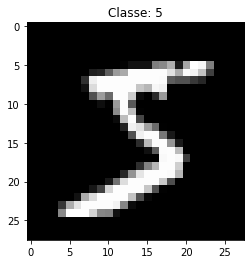

In [19]:
from matplotlib import pyplot as plt

#cmap='gray' serve per evitare di visualizzare le immagini in falsi colori
plt.imshow(mnist_train[0][0],cmap='gray') 
plt.title("Classe: "+str(mnist_train[0][1]))
plt.show()

Per lavorare su immagini, dobbiamo prima trasformarle in tensori. Ciò si può fare convertendo prima l'immagine in un array di numpy, poi in un tensore:

In [20]:
im=torch.from_numpy(np.array(mnist_train[0][0]))
im.shape #l'immagine è un tensore 28x28 pixels

torch.Size([28, 28])

Questa operazione dovrà essere effettuata su tutti gli elementi del dataset. Per automatizzare questa operazione, PyTorch permette di specificare una funzione di trasformazione, ovvero una funzione che verrà applicata a tutti gli elementi del dataset "al volo" quando questi vengono richiesti:

Per trasformare le immagini di PIL in tensori di PyTorch, specifichiamo l'oggetto `torchvision.transforms.ToTensor()` come trasformazione al costruttore di MNIST:

In [21]:
from torchvision import transforms
mnist_train = MNIST(root='data',train=True, download=True, transform=transforms.ToTensor())
mnist_test = MNIST(root='data',train=False, download=True, transform=transforms.ToTensor())

Vediamo di che tipo sono gli elementi del dataset adesso:

In [22]:
sample =  mnist_train[0]
print(type(sample[0]))
print(type(sample[1]))

<class 'torch.Tensor'>
<class 'int'>


Vediamo qual è la shape del tensore:

In [23]:
print(mnist_train[0][0].shape)

torch.Size([1, 28, 28])


Si tratta di un tensore $1 \times 28 \times 28$, dove $1$ indica che l'immagine è in scala di grigi (le immagini RGB hanno $3$ canali), mentre $28 \times 28$ indica le dimensioni delle immagini. La dimensione aggiuntiva "1" viene aggiunta in automatico dall'oggetto `ToTensor` per compatibilità con le immagini a colori. Proviamo a mostrare alcune immagini utilizzando la libreria matplotlib:

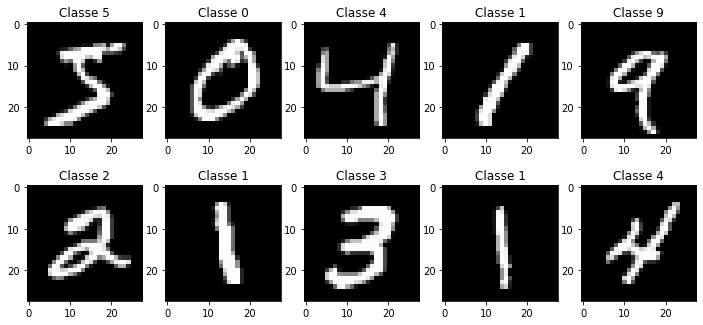

In [24]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12,5.5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title("Classe %d" % mnist_train[i][1])
    plt.imshow(mnist_train[i][0].squeeze().numpy(),cmap='gray') 
    #`squeeze` serve a trasformare il tensore 1 x 28 x 28 in un tensore 28 x 28
plt.show()

Per poter allenare un classificatore su questi dati, abbiamo bisogno di normalizzarli in modo che essi abbiano media nulla e deviazione standard unitaria. Calcoliamo media e varianza dei pixel contenuti in tutte le immagini del training set:

In [25]:
m = 0
for sample in mnist_train:
    m+=sample[0].sum() #accumuliamo la somma di tutti i pixel

#dividiamo per il numero di immagini moltiplicato per il numero di pixel
m=m/(len(mnist_train)*28*28)
    
#procedura simile per calcolare la deviazione standard
s=0
for sample in mnist_train:
    s+=((sample[0]-m)**2).sum()
    
s=np.sqrt(s/(len(mnist_train)*28*28))

I valori trovati sono i seguenti:

In [26]:
print("Mean: %0.4f"%m)
print("Std: %0.4f"%s)

Mean: 0.1307
Std: 0.3081


Va notato che questa procedura può essere effettuata per qualsiasi dataset ed è necessario effettuarla solo una volta. In seguito è possibile conservare questi valori e utilizzarli direttamente per normalizzare i dati. Possiamo dunque normalizzare un singolo campione come segue:

In [27]:
sample=(mnist_train[15][0]-m)/s
print("Minimo:",sample.min())
print("Massimo:",sample.max())
print("Media:",sample.mean())
print("Dev. Std.:",sample.std())

Minimo: tensor(-0.4241)
Massimo: tensor(2.8215)
Media: tensor(-0.0134)
Dev. Std.: tensor(0.9860)


Per evitare di effettuare questa operazione in maniera manuale, possiamo specificare l'oggetto `transforms.Normalize` come trasformazione all'oggetto dataset. Abbiamo però bisogno di combinare la nuova trasformazione con la trasformazione `ToTensor`. Per farlo usiamo l'oggetto `transforms.Compose`:

In [28]:
#Compose prende in input una lista di trasformazioni
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((m,),(s,))])
mnist_train = MNIST(root='data',train=True, download=True, transform=transform)
mnist_test = MNIST(root='data',train=False, download=True, transform=transform)

Calcoliamo qualche statistica su uno degli elementi del dataset:

In [29]:
sample=mnist_train[15][0]
print("Minimo:",sample.min())
print("Massimo:",sample.max())
print("Media:",sample.mean())
print("Dev. Std.:",sample.std())

Minimo: tensor(-0.4241)
Massimo: tensor(2.8215)
Media: tensor(-0.0134)
Dev. Std.: tensor(0.9860)


Ogni immagine è adesso rappresentata da un tensore $1 \times 28 \times 28$. Tuttavia finora abbiamo visto solo algoritmi (es. regressore softmax) che lavorano su vettori unidimensionali di dati. Per poter lavorare sulle immagini con questi metodi, possiamo trasformare le immagini $28 \times 28$ in vettori di $784$ dimensioni come segue:

In [30]:
sample = sample.view(-1)
print(sample.shape)

torch.Size([784])


Se vogliamo effettuare anche questa operazione in automatico mediante le trasformazioni, possiamo definirne una "custom" utilizzando la funzione `torchvision.Lambda`:

In [31]:
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((m,),(s,)),
                               transforms.Lambda(lambda x: x.view(-1))])#specifichiamo l'operazione "custom"
mnist_train = MNIST(root='data',train=True, download=True, transform=transform)
mnist_test = MNIST(root='data',train=False, download=True, transform=transform)

In [32]:
print(mnist_train[0][0].shape)
print(mnist_train[0][1])

torch.Size([784])
5


## 2.2 Data Loader
Ogni campione ottenuto mediante l'oggetto dataset MNIST verrà automaticamente normalizzato e trasformato in un vettore. Per effettuare l'ottimizzazione mediante Stochastic Gradient Descent, dobbiamo suddividere i campioni in mini-batch. Inoltre, è importante fornire i campioni in ordine casuale, in quanto fornire consecutivamente elementi con caratteristiche simili (es. stessa classe) favorirebbe l'overfitting. PyTorch ci permette di gestire il "batching" in automatico e in maniera multithread mediante l'oggetto `DataLoader`. Utilizziamo un batch size di $256$ immagini e due thread paralleli per velocizzare il caricamento dei dati:

In [33]:
from torch.utils.data import DataLoader
mnist_train_loader = DataLoader(mnist_train, batch_size=256, num_workers=2, shuffle=True)
#shuffle permette di accedere ai dati in maniera casuale
mnist_test_loader = DataLoader(mnist_test, batch_size=256, num_workers=2)

I data loader sono degli oggetti iterabili. Possiamo dunque accedere ai diversi batch in maniera sequenziale all'interno di un ciclo for. Il ciclo terminerà quando tutti i batch del dataset saranno stati caricati. Proviamo ad accedere al primo batch e interrompiamo il ciclo:

In [34]:
for batch in mnist_test_loader:
    break
    
print(batch[0].shape)
print(batch[1].shape)

torch.Size([256, 784])
torch.Size([256])


Il batch contiene $256$ vettori di training di dimensione $784$ e altrettante etichette corrisponenti. Se il numero di elementi del dataset non è un multiplo del batch size, l'ultimo batch sarà di dimensioni inferiori. Proviamo ad iterare tutto il loader e vediamo quanti elementi contiene l'ultimo batch:

In [35]:
for batch in mnist_test_loader:
    pass
    
print(batch[0].shape)
print(batch[1].shape)

torch.Size([16, 784])
torch.Size([16])


## 2.3 Salvataggio e Caricamento di Modelli

Quando si allenano modelli su grandi dataset, la procedura di allenamento può essere molto lenta. Risulta dunque conveniente poter salvare su disco i modelli in modo da poterli caricare e riutilizzare in seguito. PyTorch permette di salvare e caricare modelli in maniera semplice. Il salvataggio viene effettuato serializzando tutti i parametri. E' possibile accedere a un dizionario contenente tutti i parametri del modello utilizzando il metodo `state_dict`.

In [36]:
state_dict=model.state_dict()
print(state_dict.keys())

odict_keys(['linear.weight', 'linear.bias'])


Nel nostro caso si tratta di soli due elementi, ma in generale potrebbero essere di più. Possiamo dunque salvare il dizionario mediante `torch.save`:

In [37]:
torch.save(model.state_dict(),'model.pth')

Per ripristinare lo stato del modello, dobbiamo prima costruire l'oggetto e poi utilizzare il metodo `load_state_dict`:

In [38]:
model = SoftMaxRegressor(4,3)
model.load_state_dict(torch.load('model.pth'))

<All keys matched successfully>

## 2.4 Allenamento su GPU

Dato che l'allenamento di un modello su grandi quantità di dati può essere lento, risulta conveniente velocizzare i calcoli effettuando l'allenamento su GPU, qualora una GPU dovesse essere disponibile nel sistema. Vediamo alcuni semplici passi per convertire il codice di training in questo senso.

E' possibile verificare qualora una GPU sia disponibile nel sistema come segue:

In [39]:
torch.cuda.is_available()

False

Possiamo dunque costruire una variabile `device` che sia uguale a `cpu` se non c'è nessuna GPU disponibile e `cuda` altrimenti:

In [40]:
device = "cuda" if torch.cuda.is_available() else "cpu"

A questo punto, dobbiamo "portare" il modello che utilizzeremo sul device corretto. Possiamo farlo come segue:

In [41]:
model.to(device)

SoftMaxRegressor(
  (linear): Linear(in_features=4, out_features=3, bias=True)
)

La stessa operazione va effettuata su ciascun tensore con il quale lavoreremo, come segue:

In [42]:
X_training_norm.to(device);

Queste modifiche ci permetteranno di utilizzare la GPU automaticamente se disponibile.

## 2.5 Log di loss e accuracy e SGD

Quando si effettua un allenamento mediante stochastic gradient descent, risulta un po' meno immedianto effettuare il log di loss e accuarcy. In genere, abbiamo conservato i valori di loss e accuracy calcolati su training set e test set alla fine di ogni epoca. Tuttavia, noi calcoleremo esplicitamente loss e accuracy sui singoli batch.

Per ottenere delle stime valide per ogni epoca, accumuleremo i valori di loss e accuracy batch per batch e calcoleremo la media di questi valori pesata sulla base del numero di elementi contenuti in quel batch. Supponiamo di avere 3 batch nel dataset, la loss totale va calcolata come segue:

\begin{equation}
L = \frac{l_0\cdot n_0 + l_1 \cdot n_1 + l_2 \cdot n_2}{n_0+n_1+n_2}
\end{equation}

dove $l_i$ è la loss calcolata al batch i-esimo e $n_i$ è il numero di elementi contenuti nel batch i-esimo. E' inoltre possibile calcolare la loss "parziale" ad un batch diverso dal batch finale come segue:

\begin{equation}
L_1 = \frac{l_0\cdot n_0 + l_1 \cdot n_1}{n_0+n_1}
\end{equation}

dove $L_1$ è la loss parziale calcolata fino al batch 1. Questi calcoli possono essere automatizzati mediante un oggetto chiamato `Meter`. Scriviamone uno molto semplice:

In [43]:
class AverageValueMeter():
    def __init__(self):
        self.reset()
        
    def reset(self):
        self.sum = 0
        self.num = 0
    
    def add(self, value, num):
        self.sum += value*num
        self.num += num
        
    def value(self):
        try:
            return self.sum/self.num
        except:
            return None

Vediamo come utilizzare la classe appena definita:

In [44]:
meter = AverageValueMeter()

meter.add(10,3) #inseriamo il valore 10, calcolato da un batch di 3 elementi
meter.add(3,5) #inseriamo il valore 3, calcolato da un batch di 5 elementi
meter.add(-1,2) #inseriamo il valore -1, calcolato da un batch di 2 elementi

#media pesata calcolata manualmente:
print('Media pesata calcolata manualmente:',(10*3+3*5-1*2)/(3+5+2))
print('Media pesata calcolata mediante meter:',meter.value())

Media pesata calcolata manualmente: 4.3
Media pesata calcolata mediante meter: 4.3


E' possibile ripristinare un meter ai valori iniziali mediante il metodo `reset`:

In [45]:
meter.reset()
print(meter.value())

None


Il meter creato ci permette di ottenere una stima corrente di loss e accuracy. Dato che una epoca di training può richiedere anche diverse ore a seconda del dataset e del momento, loggeremo queste stime ad ogni iterazione. In questo caso, utilizzeremo come `global_step` il numero totale di campioni attualmente "visti" durante il training.

## 2.5 Allenamento mediante SGD
Alleniamo adesso mediante Stochastic Gradient Descent un regressore Softmax per classificare gli elementi del dataset `MNIST`. Utilizzeremo due cicli for, uno esterno per iterare lungo le epoche e uno interno per iterare lungo i batch. Il resto della procedura di training resta uguale. Per monitorare il training, all'interno di ogni epoca effettueremo un ciclo di training e un ciclo di test. Con dataset grandi, la procedura di training può essere lunga. Pertanto salveremo una copia del modello ad ogni iterazione.

Definiamo adesso una funzione di training che possiamo riutilizzare in seguito:

In [46]:
from os.path import join
def train_classifier(model, train_loader, test_loader, exp_name='experiment', lr=0.001, epochs=10, momentum=0.9, logdir='logs'):
    criterion = nn.CrossEntropyLoss() 
    optimizer = SGD(model.parameters(), lr, momentum=momentum) 
    #meters
    loss_meter = AverageValueMeter()
    acc_meter = AverageValueMeter()
    #writer
    writer = SummaryWriter(join(logdir, exp_name))
    #device
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)
    #definiamo un dizionario contenente i loader di training e test
    loader = {
        'train' : train_loader,
        'test' : test_loader
    }
    #inizializziamo il global step
    global_step = 0
    for e in range(epochs):
        #iteriamo tra due modalità: train e test
        for mode in ['train','test']:
            loss_meter.reset(); acc_meter.reset()
            model.train() if mode == 'train' else model.eval()
            with torch.set_grad_enabled(mode=='train'): #abilitiamo i gradienti solo in training
                for i, batch in enumerate(loader[mode]):
                    x=batch[0].to(device) #"portiamoli sul device corretto"
                    y=batch[1].to(device)
                    output = model(x)
                    
                    #aggiorniamo il global_step
                    #conterrà il numero di campioni visti durante il training
                    n = x.shape[0] #numero di elementi nel batch
                    global_step += n
                    l = criterion(output,y)

                    if mode=='train':
                        l.backward()
                        optimizer.step()
                        optimizer.zero_grad()

                    acc = accuracy_score(y.to('cpu'),output.to('cpu').max(1)[1])
                    loss_meter.add(l.item(),n)
                    acc_meter.add(acc,n)

                    #loggiamo i risultati iterazione per iterazione solo durante il training
                    if mode=='train':
                        writer.add_scalar('loss/train', loss_meter.value(), global_step=global_step)
                        writer.add_scalar('accuracy/train', acc_meter.value(), global_step=global_step)
            #una volta finita l'epoca (sia nel caso di training che test, loggiamo le stime finali)
            writer.add_scalar('loss/' + mode, loss_meter.value(), global_step=global_step)
            writer.add_scalar('accuracy/' + mode, acc_meter.value(), global_step=global_step)
            
        #conserviamo i pesi del modello alla fine di un ciclo di training e test
        torch.save(model.state_dict(),'%s-%d.pth'%(exp_name,e+1))
    return model

Alleniamo adesso il modello come segue:

In [47]:
lr = 0.01
epochs = 10
momentum = 0.9

transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((m,),(s,)),
                               transforms.Lambda(lambda x: x.view(-1))])

mnist_train = MNIST(root='data',train=True, download=True, transform=transform)
mnist_test = MNIST(root='data',train=False, download=True, transform=transform)

mnist_train_loader = DataLoader(mnist_train, batch_size=256, num_workers=2, shuffle=True)
mnist_test_loader = DataLoader(mnist_test, batch_size=256, num_workers=2)

model = SoftMaxRegressor(784, 10)

model = train_classifier(model, mnist_train_loader, mnist_test_loader, 'SGD-softmax-regressor', lr=lr, epochs=epochs, momentum=momentum)

Alla fine del training, su tensorboard dovremmo osservare un grafico del genere:

<center>
    <img width=70% src='img/mnist_sgd_tb.jpg'>
</center>

**Domanda 6**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Guardando i grafici ottenuti, sembra possibile migliorare l'accuracy di test allenando il modello per un numero maggiore di epoche? Perché?

**Risposta 6**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

Per valutare le performance del modello, dobbiamo prima ottenere le predizioni per ciascuno degli elementi di test. Per farlo, definiamo la seguente funzione:

In [48]:
def test_classifier(model, loader):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)
    predictions, labels = [], []
    for batch in loader:
        x = batch[0].to(device)
        y = batch[1].to(device)
        output = model(x)
        preds = output.to('cpu').max(1)[1].numpy()
        labs = y.to('cpu').numpy()
        predictions.extend(list(preds))
        labels.extend(list(labs))
    return np.array(predictions), np.array(labels)

Possiamo dunque ottenere le predizioni di training e test e valutare il modello con le misure di valutazioni che preferiamo. Ad esempio, mediante accuracy:

In [49]:
predictions_train, labels_train = test_classifier(model, mnist_train_loader)
predictions_test, labels_test = test_classifier(model, mnist_test_loader)
print("Accuarcy di training: %0.4f"% accuracy_score(labels_train, predictions_train))
print("Accuarcy di test: %0.4f"% accuracy_score(labels_test, predictions_test))

Accuarcy di training: 0.9285
Accuarcy di test: 0.9228


# 3 Multilayer Perceptron (MLP)

Finora abbiamo visto dei semplici modelli lineari per classificazione e regressione. Tali modelli possono essere estesi in maniera molto semplice a modelli più "profondi", quali il MultiLayer Perceptron (MLP) mediante PyTorch.

Una rete di tipo MLP è composta da tre livelli:
 * Un livello di "input" nel quale verranno presentati i dati in ingresso;
 * Un livello "nascosto" che conterrà delle rappresentazioni "latenti" dei dati;
 * Un livello di "uscita" che conterrà i dati di output (le etichette regresse).
 
<center>
<img src="img/mlp.png" width=600px>
</center>

Il livello "nascosto" è detto tale in quanto durante il training non viene esercitato un controllo diretto sui valori che esso assume (la loss è applicata al layer di output). Si dice pertanto che il livello apprende una "rappresentazione latente".

Dei tre livelli, gli unici due che contengono parametri che possono essere appresi sono il secondo e il terzo. Pertanto si dice spesso che un MLP di questo tipo contiene solo "due layer".

Nel caso in cui volessimo implementare un regressore, l'ultimo livello del MLP conterrebbe i valori da regredire. Nel caso in cui volessimo implementare un regressore softmax (ovvero un classificatore), l'ultimo livello deve contenere un numero di nodi pari al numero di classi e i valori assunti da questi nodi sono da considerare come dei logit.

## 3.1 Fashion-MNIST
Vedremo degli esempi di classificatori MLP su un'altro dataset simile a MNIST in dimensioni ma più complesso in termini di contenuto visuale: Fashion-MNIST.

Fashion-MNIST è un dataset introdotto da Zalando nel 2017. Il dataset è progettato per essere compatto in maniera simile a MNIST-DIGITS, in modo da poter essere utilizzato in maniera agevole per effettuare esperimenti veloci (utili quando si vuole appurare la bontà di un'idea). Allo stesso tempo, il problema di classificazione proposto con il dataset è molto più complesso di quello relativo a MNIST-DIGITS. In maniera del tutto simile a MNIST-DIGITS, il dataset contiene $60,000$ immagini di training e $10,000$ immagini di testing grandi $28 \times 28$ pixels. Le immagini sono suddivise in $10$ classi relative al mondo della moda, come riassunto di seguito.

<center>
<img width=800px src="img/fashion.png">
</center>

Similmente a quanto avviene per MNIST-DIGITS, PyTorch mette a disposizioni un oggetto per permettere di caricare agevolmente i dati. Carichiamo il dataset e visualizziamo qualche esempio:

Extracting fashion/FashionMNIST/raw/train-images-idx3-ubyte.gz to fashion/FashionMNIST/raw


Extracting fashion/FashionMNIST/raw/train-labels-idx1-ubyte.gz to fashion/FashionMNIST/raw


Extracting fashion/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to fashion/FashionMNIST/raw


Extracting fashion/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to fashion/FashionMNIST/raw
Processing...
Done!





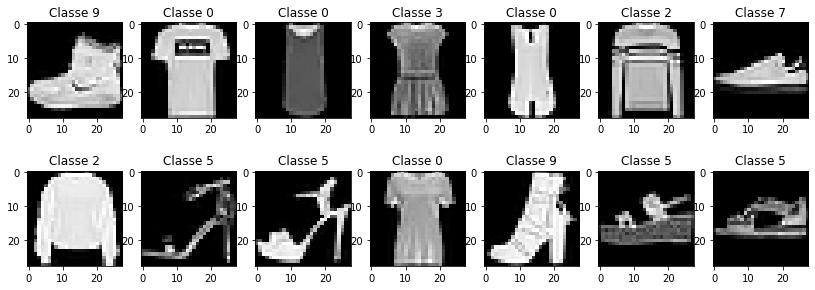

In [50]:
from torchvision.datasets import FashionMNIST
from matplotlib import pyplot as plt
from torchvision import transforms

fashion_train = FashionMNIST(root='fashion',train=True, download=True, transform=transforms.ToTensor())
fashion_test = FashionMNIST(root='fashion',train=False, download=True, transform=transforms.ToTensor())

plt.figure(figsize=(14,5))
for i in range(14):
    plt.subplot(2,7,i+1)
    plt.title("Classe %d" % fashion_train[i][1])
    plt.imshow(fashion_train[i][0].squeeze().numpy(),cmap='gray') 
    #`squeeze` serve a trasformare il tensore 1 x 28 x 28 in un tensore 28 x 28
plt.show()

**Domanda 7**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Cosa rende MNIST-Fashion più "complesso" di MNIST-DIGITS? Fare un esempio considerando qualcuno dei campioni visualizzati.

**Risposta 7**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

Definiamo i dataloaders con le opportune trasformazioni. Utilizzeremo la media e deviazione standard relative al dataset, ovvero $0.2860$ e $0.3530$ rispettivamente (sono state pre-computate):

In [51]:
transform = transforms.Compose([transforms.ToTensor(), #conversione in tensore
                                #normalizzazione per media e deviazione standard 
                                #(0.2860 e 0.3530 sono media e dev standard del dataset)
                                transforms.Normalize((0.2860,),(0.3530,)),
                                #trasformiamo l'immagine 28x28 in un vettore di 784 componenti
                               transforms.Lambda(lambda x: x.view(-1))])

#ridefiniamo i dataset specificando le trasformazioni
fashion_train = FashionMNIST(root='data',train=True, download=True, transform=transform)
fashion_test = FashionMNIST(root='data',train=False, download=True, transform=transform)

#definiamo i dataloaders
fashion_train_loader = DataLoader(fashion_train, batch_size=256, num_workers=2, shuffle=True)
#shuffle permette di accedere ai dati in maniera casuale
fashion_test_loader = DataLoader(fashion_test, batch_size=256, num_workers=2)

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw
Processing...
Done!


Iniziamo ad esplorare il dataset allenando un regressore softmax con il codice di training scritto in precedenza:

In [52]:
fashion_softmax_regressor = SoftMaxRegressor(784, 10)
fashion_softmax_regressor = train_classifier(fashion_softmax_regressor,fashion_train_loader, \
                                             fashion_test_loader, 'fashion_softmax_regressor',\
                                             lr=0.01,epochs=10)

Otteniamo accuracy di training e test:

In [53]:
predictions_train_fashion_softmax_regressor, labels_train_fashion = test_classifier(fashion_softmax_regressor, fashion_train_loader)
predictions_test_fashion_softmax_regressor, labels_test_fashion = test_classifier(fashion_softmax_regressor, fashion_test_loader)
print("Fashion Softmax Regressor - Accuarcy di training: %0.4f"% accuracy_score(labels_train_fashion, predictions_train_fashion_softmax_regressor))
print("Fashion Softmax Regressor - Accuarcy di test: %0.4f"% accuracy_score(labels_test_fashion, predictions_test_fashion_softmax_regressor))

Fashion Softmax Regressor - Accuarcy di training: 0.8613
Fashion Softmax Regressor - Accuarcy di test: 0.8377


**Domanda 8**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Si osservino i grafici ottenuti su tensorboard. Il modello è arrivato a convergenza? E' possibile ottenere risultati migliori allenandolo per più epoche?

**Risposta 8**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

## 3.1 Classificatore MLP
Vediamo come implementare un semplice classificatore MLP. Utilizzeremo la tangente iperbolica come funzione di attivazione:

In [54]:
class MLPClassifier(nn.Module):
    def __init__(self, in_features, hidden_units, out_classes):
        """Costruisce un classificatore MLP.
            Input:
                in_features: numero di feature in input (es. 784)
                hidden_units: numero di unità nel livello nascosto (es. 512)
                out_classes: numero di classi in uscita (es. 10)"""
        super(MLPClassifier, self).__init__() 
        self.hidden_layer = nn.Linear(in_features, hidden_units)
        self.activation = nn.Tanh()
        self.output_layer = nn.Linear(hidden_units, out_classes)
        
    def forward(self,x):
        hidden_representation = self.hidden_layer(x)
        hidden_representation = self.activation(hidden_representation)
        scores = self.output_layer(hidden_representation)
        return scores

**Domanda 9**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Si confronti il codice scritto sopra con quello del SoftMax regressor. Quali sono le principali differenze?

**Risposta 9**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

Alleniamo adesso il classificatore MLP su Fashion-MNIST

In [55]:
fashion_mlp_classifier = MLPClassifier(784, 512, 10)
fashion_mlp_classifier = train_classifier(fashion_mlp_classifier,fashion_train_loader, \
                                             fashion_test_loader, 'fashion_mlp_classifier',\
                                             lr=0.01,epochs=10)

Calcoliamo accuracy di training e test:

In [56]:
predictions_train_fashion_mlp_classifier, labels_train = test_classifier(fashion_mlp_classifier, fashion_train_loader)
predictions_test_fashion_mlp_classifier, labels_test = test_classifier(fashion_mlp_classifier, fashion_test_loader)
print("Fashion MLP Classifier - Accuarcy di training: %0.4f"% accuracy_score(labels_train, predictions_train_fashion_mlp_classifier))
print("Fashion MLP Classifier - Accuarcy di test: %0.4f"% accuracy_score(labels_test, predictions_test_fashion_mlp_classifier))

Fashion MLP Classifier - Accuarcy di training: 0.8979
Fashion MLP Classifier - Accuarcy di test: 0.8748


**Domanda 10**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Si confrontino le performance ottenute dal MLP con quelle ottenute dal Softmax regeressor. Quale dei due modelli raggiunge risultati migliori?

**Risposta 10**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

## 3.2 Classificatore MLP "Profondo" (Deep MLP)
E' possibile costruire un classificatore MLP con un numero arbitrario di livelli. In generere, quando il MLP ha più di 3 livelli, esso viene detto "prondo" (deep). Ad esempio un MLP con due livelli nascosti (4 livelli in tutto) può essere rappresentato come segue:

<center>
<img src="img/deep_mlp.png" width=600px>
</center>

Si noti che ad ogni livello nascosto segue la funzione di attivazione.

**Domanda 11**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Perché è necessario inserire le funzioni di attivazione dopo ciascun livello nascosto? Potremmo farne a meno?

**Risposta 11**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

Implementiamo il classificatore MLP profondo. Dato che in un MLP l'output di un livello è sempre l'input del livello successivo, possiamo implementare in maniera compatta il modello utilizzando il modulo `nn.Sequential` che permette di connettere moduli in cascata. Ad esempio, il seguente codice:

```python
y = modulo1(x)
z = modulo2(y)
h = modulo3(h)
```

è implementato come segue con `nn.Sequential`:

```python
seq = nn.Sequential(modulo1, modulo2, modulo3)
h = seq(x)
```

Definiamo la classe `DeepMLPClassifier`:

In [57]:
class DeepMLPClassifier(nn.Module):
    def __init__(self, in_features, hidden_units, out_classes):
        """Costruisce un classificatore MLP "profondo".
            Input:
                in_features: numero di feature in input (es. 784)
                hidden_units: numero di unità nei livelli nascosti (es. 512)
                out_classes: numero di classi in uscita (es. 10)"""
        super(DeepMLPClassifier, self).__init__() 
        
        self.model = nn.Sequential(nn.Linear(in_features, hidden_units),
                                               nn.Tanh(),
                                               nn.Linear(hidden_units, hidden_units),
                                               nn.Tanh(),
                                               nn.Linear(hidden_units, out_classes))
        
    def forward(self,x):
        return self.model(x)

Adesso alleniamo il modello su Fashion-MNIST:

In [58]:
fashion_deep_mlp_classifier = DeepMLPClassifier(784, 512, 10)
fashion_deep_mlp_classifier = train_classifier(fashion_deep_mlp_classifier,fashion_train_loader, \
                                             fashion_test_loader, 'fashion_deep_mlp_classifier',\
                                             lr=0.01,epochs=10)

Calcoliamo adesso accuracy di training e test:

In [59]:
predictions_train_fashion_deep_mlp_classifier, labels_train = test_classifier(fashion_deep_mlp_classifier, fashion_train_loader)
predictions_test_fashion_deep_mlp_classifier, labels_test = test_classifier(fashion_deep_mlp_classifier, fashion_test_loader)
print("Fashion Deep MLP Classifier - Accuarcy di training: %0.4f"% accuracy_score(labels_train, predictions_train_fashion_deep_mlp_classifier))
print("Fashion Deep MLP Classifier - Accuarcy di test: %0.4f"% accuracy_score(labels_test, predictions_test_fashion_deep_mlp_classifier))

Fashion Deep MLP Classifier - Accuarcy di training: 0.8992
Fashion Deep MLP Classifier - Accuarcy di test: 0.8716


**Domanda 12**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Si confrontino i risultati con quelli ottenuti mediante MLP. Quale dei due modelli raggiunge risultati migliori?

**Risposta 12**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

# 4 Costruzione di un Oggetto Dataset Personalizzato

Abbiamo visto che PyTorch mette a disposizione alcuni oggetti dataset (ad esempio MNIST) che permettono di caricare determinati set di dati. Se vogliamo allenare un algoritmo su un set di dati non incluso in PyTorch, dobbiamo costruire un oggetto Dataset che ci permetta di caricare i dati. Inizieremo considerando il dataset disponibile al seguente URL:

<center>http://people.csail.mit.edu/torralba/code/spatialenvelope/</center>


Si tratta di un dataset contenente $2688$ immagini a colori di dimensioni $256 \times 256$, suddivise in $8$ classi a seconda del tipo di scena ritratto:
 1. coast
 * forest
 * highway
 * insidecity
 * mountain
 * opencountry
 * street
 * tallbuilding
 
Il dataset si può scaricare da:
<center><a href="http://people.csail.mit.edu/torralba/code/spatialenvelope/spatial_envelope_256x256_static_8outdoorcategories.zip">http://people.csail.mit.edu/torralba/code/spatialenvelope/spatial_envelope_256x256_static_8outdoorcategories.zip</a>
</center>

<br>

Scarichiamo il dataset e estraiamo i file nella cartella `8scenes` nella directory di lavoro. La cartella conterrà le $2688$ immagini a colore. La classe di appartenenza di ogni immagine è inclusa nel nome del file (ad es. `coast_bea9.jpg`). Il dataset non è suddiviso in training e test set. Per lavorare sullo stesso training/testing split, scarichiamo l'archivio zip disponibile all'URL:

<center><a href="http://iplab.dmi.unict.it/furnari/downloads/8scenes_train_test_split.zip">http://iplab.dmi.unict.it/furnari/downloads/8scenes_train_test_split.zip</a>
</center>
<br>

Estraiamo il contenuto dell'archivio all'interno della cartella `8scenes`. L'archivio contiene tre file:

 * `train.txt`: contiene i nomi di $2188$ immagini di training con le relative etichette in formato numerico ($0-7$);
 * `test.txt`: contiene i nomi delle rimanenti $500$ immagini di testing con le relative etichette in formato numerico;
 * `classes.txt`: contiene i nomi delle classi. In particolare, la riga i-esima conterrà il nome della classe i-esima (dunque il nome della classe indicata come $0$ in `train.txt` e `test.txt` sarà contenuto nella prima riga del file.

Costruiremo adesso un oggetto Dataset che ci permetta di caricare le immagini di training e test. Ciò si può fare in maniera molto naturale in PyTorch ereditando dalla classe `Dataset`. Ogni oggetto `Dataset` deve contenere almeno i seguenti metodi:
 * Un costruttore;
 * Il metodo `__len__`, che restituisce il numero di elementi contenuti nel dataset;
 * Il metodo `__getitem__`, che prende in input un indice $i$ e restituisce l'$i$-esimo elemento del dataset.

In [60]:
from torch.utils.data.dataset import Dataset
from PIL import Image
from os import path

class ScenesDataset(Dataset):
    """Implementa l'oggetto ScenesDataset che ci permette di caricare
    le immagini del dataset 8 Scenes"""
    def __init__(self,base_path,txt_list,transform=None):
        """Input:
            base_path: il path alla cartella contenente le immagini
            txt_list: il path al file di testo contenente la lista delle immagini
                        con le relative etichette. Ad esempio train.txt o test.txt.
            transform: implementeremo il dataset in modo che esso supporti le trasformazioni"""
        #conserviamo il path alla cartella contenente le immagini
        self.base_path=base_path 
        #carichiamo la lista dei file
        #sarà una matrice con n righe (numero di immagini) e 2 colonne (path, etichetta)
        self.images = np.loadtxt(txt_list,dtype=str,delimiter=',')
        #conserviamo il riferimento alla trasformazione da applicare
        self.transform = transform

    def __getitem__(self, index):
        #recuperiamo il path dell'immagine di indice index e la relativa etichetta
        f,c = self.images[index]
        
        #carichiamo l'immagine utilizzando PIL
        im = Image.open(path.join(self.base_path, f))
        
        #se la trasfromazione è definita, applichiamola all'immagine
        if self.transform is not None:
            im = self.transform(im)
        
        #convertiamo l'etichetta in un intero
        label = int(c)

        #restituiamo un dizionario contenente immagine etichetta
        return {'image' : im, 'label':label}

    #restituisce il numero di campioni: la lunghezza della lista "images"
    def __len__(self):
        return len(self.images)

Proviamo adesso a istanziare il dataset per caricare dei dati:

In [61]:
dataset = ScenesDataset('8scenes','8scenes/train.txt',transform=transforms.ToTensor())
sample = dataset[0]
#l'immagine è 3 x 256 x 256 perché è una immagine a colori
print(sample['image'].shape)
print(sample['label'])

torch.Size([3, 256, 256])
1


Le immagini sono di dimensione $256 \times 256$. Per ridurre i tempi computazionali, potremmo voler lavorare con immagini più piccole. Possiamo utilizzare la trasformazione `Resize` per ridimensionarle a una dimensione predefinita, ad esempio $32 \times 32$:

In [62]:
transform = transforms.Compose([transforms.Resize(32),transforms.ToTensor()])
dataset = ScenesDataset('8scenes','8scenes/train.txt',transform=transform)
sample = dataset[0]
print(sample['image'].shape)
print(sample['label'])

torch.Size([3, 32, 32])
1


Per poter normalizzare i dati, calcoliamo medie e varianze di tutti i pixel contenuti nelle immagini del dataset. Nel caso di immagini a colori, tali valori sono spesso calcolati canale per canale:

In [63]:
dataset = ScenesDataset('8scenes','8scenes/train.txt',transform=transforms.ToTensor())
m = np.zeros(3)
for sample in dataset:
    m+=sample['image'].sum(1).sum(1).numpy() #accumuliamo la somma dei pixel canale per canale

#dividiamo per il numero di immagini moltiplicato per il numero di pixel
m=m/(len(dataset)*256*256)
    
#procedura simile per calcolare la deviazione standard
s = np.zeros(3)
for sample in dataset:
    s+=((sample['image']-torch.Tensor(m).view(3,1,1))**2).sum(1).sum(1).numpy()
    
s=np.sqrt(s/(len(dataset)*256*256))

Medie e deviazioni standard per i tre canali sono:

In [64]:
print("Medie",m)
print("Dev.Std.",s)

Medie [0.42478882 0.45170449 0.4486707 ]
Dev.Std. [0.25579564 0.2465238  0.27658251]


Possiamo inserire la corretta normalizzazione tra le trasformazioni. Ad esempio:

In [65]:
transform = transforms.Compose([transforms.Resize(32),
                                transforms.ToTensor(),
                                transforms.Normalize(m,s),
                               transforms.Lambda(lambda x: x.view(-1))])
dataset = ScenesDataset('8scenes','8scenes/train.txt',transform=transform)

print(dataset[0]['image'].shape)
print(dataset[0]['label'])

torch.Size([3072])
1


# Esercizi

<img src="img/code.png" style="width:150px; margin-right:30px; float:left">

**Esercizio 1**

Si modifichi il codice che implementa il regressore softmax sul dataset degli Iris di Fisher per utilizzare la loss:
$\mathcal{L}_\theta(\mathbf{x},j) = - \log f(\mathbf{x})_j$. Si provi a ripetere l'addestramento per diversi learning rate e si confrontino i risultati ottenuti con la loss vista nel laboratorio. Ci sono delle differenze?

<img src="img/code.png" style="width:150px; margin-right:30px; float:left">

**Esercizio 2**

Si confrontino le performance di un classificatore softmax con quelle di un classificatore one-vs-all che si basa su un regressore logistico nel caso delle iris di Fisher.

<img src="img/code.png" style="width:150px; margin-right:30px; float:left">

**Esercizio 3**

I modelli visti in questo laboratorio sono stati allenati per poche epoche. Ripetere l'analisi effettuata in questo laboratorio allenando i modelli per un numero di epoche sufficiente a farli convergere (si analizzino i grafici per dedurre quando i modelli sono arrivati a convergenza). Si confrontino i numeri di epoche necessarie per far convergere i diversi modelli. Quali ne richiedono di più? Quali ne richiedono di meno? Si valutino e confrontino le performance di tutti i modelli con gli score $F_1$ per classe e con la media di questi valor ($mF_1$), con le matrici di confusione e mediante l'accuracy.

<img src="img/code.png" style="width:150px; margin-right:30px; float:left">

**Esercizio 4**

Si allenino un regressore lineare, un regressore MLP e un regressore MLP con due livelli nascosti sul dataset di regressore Boston. Si confrontino le performance dei modelli. Quale ottiene risultati più accurati?

<img src="img/code.png" style="width:150px; margin-right:30px; float:left">

**Esercizio 5**

Si ripeta l'analisi fatta su Fashion-MNIST con Classificatore MLP e Deep-MLP sul dataset MNIST. Ri raggiungono conclusioni simili?

<img src="img/code.png" style="width:150px; margin-right:30px; float:left">

**Esercizio 6**

Si costruisca un oggetto Dataset per caricare i dati utili al proprio progetto di Machine Learning. Si calcolino medie e deviazioni standard utili a normalizzare i dati.

# References

 * Documentazione di PyTorch. http://pytorch.org/docs/stable/index.html